Our project topic is "Happy whale - whale and dolphin identification". The purpose of out project is automatically distinguish between whales and dolphins through an automatic picture recognition system. Our project can help marine researchers automatically distinguish between dolphins and whales, so they do not need to spend a lot of time manually distinguishing pictures. We found that the automatic identification of whales and dolphins is similar to the automatic identification of human being that has been achieved so far,and the same principle can be used to achieve the purpose.

coding reference：
https://www.kaggle.com/code/derrickmwiti/simple-convolutional-neural-network
https://www.kaggle.com/code/meetnagadia/happywhale-2022-using-cnn

1.1 Initial setting (Download the dataset to colab form kaggle)
  Here we use small size of image in order to reduce storage burden
  Each picture's size is 128*128.

In [ ]:
! pip install -q kaggle
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d rdizzl3/jpeg-happywhale-128x128
! unzip jpeg-happywhale-128x128.zip

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: train_images-128-128/train_images-128-128/e7bc059aee4278.jpg  
  inflating: train_images-128-128/train_images-128-128/e7bdb883f8c192.jpg  
  inflating: train_images-128-128/train_images-128-128/e7be23bf6653c8.jpg  
  inflating: train_images-128-128/train_images-128-128/e7be96514ee807.jpg  
  inflating: train_images-128-128/train_images-128-128/e7c0df0b76833c.jpg  
  inflating: train_images-128-128/train_images-128-128/e7c17317474d34.jpg  
  inflating: train_images-128-128/train_images-128-128/e7c36c00dd51af.jpg  
  inflating: train_images-128-128/train_images-128-128/e7c7fef8d408ca.jpg  
  inflating: train_images-128-128/train_images-128-128/e7ca953a8b7a2e.jpg  
  inflating: train_images-128-128/train_images-128-128/e7d1574453ba7f.jpg  
  inflating: train_images-128-128/train_images-128-128/e7d1cdb2fdf583.jpg  
  inflating: train_images-128-128/train_images-128-128/e7d2503911061d.jpg  
  inflating: train_images-128-128/train_images-128-128/e7d2b7

First of all, we need to download pictures which we will use for train and test purpose from kaggle, and we have 5w+ pictures for us to train and test.

In [ ]:
! pip install tensorflow

     |████████████████████████████████| 462 kB 4.4 MB/s 


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


The framwork we use for this project is called tensorflow, it is a very popular framwork nowadays for AI learning.

1.2 Create the programming environment. 

In [ ]:
# These library are for data manipulation 
import numpy as np
import pandas as pd

# These library are for working with directories
import os
from glob import glob
from tqdm import tqdm

# These library are for Visualization(making the plot for evaluation part)
import matplotlib.pyplot as plt
import plotly.express as px

# These Library are for converting Label Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# These library are for building model 
from tensorflow.keras import layers
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Import some libraries that we will use in our project.

1.3 data loading and initial data analysis
After that, we load the traning data resource.
Here we have total 51033 dataset split into 30 parts represented 30 different species

In [ ]:
training_data_set = pd.read_csv("train.csv")
print('Number train samples: ', len(training_data_set))
training_data_set.head()
print('all the species summary in the training data set: ')
training_data_set['species'].value_counts()
 #https://www.kaggle.com/code/meetnagadia/happywhale-2022-using-cnn

Number train samples:  51033
all the species summary in the training data set: 


bottlenose_dolphin           9664
beluga                       7443
humpback_whale               7392
blue_whale                   4830
false_killer_whale           3326
dusky_dolphin                3139
spinner_dolphin              1700
melon_headed_whale           1689
minke_whale                  1608
killer_whale                 1493
fin_whale                    1324
gray_whale                   1123
bottlenose_dolpin            1117
kiler_whale                   962
southern_right_whale          866
spotted_dolphin               490
sei_whale                     428
short_finned_pilot_whale      367
common_dolphin                347
cuviers_beaked_whale          341
pilot_whale                   262
long_finned_pilot_whale       238
white_sided_dolphin           229
brydes_whale                  154
pantropic_spotted_dolphin     145
globis                        116
commersons_dolphin             90
pygmy_killer_whale             76
rough_toothed_dolphin          60
frasiers_dolph

We will plot a pie chart for all the species available in the traning data with Ploty lib # https://www.kaggle.com/code/meetnagadia/happywhale-2022-using-cnn

In [ ]:
fig = px.pie(training_data_set, values=training_data_set['species'].value_counts().values, names=training_data_set['species'].value_counts().index)
fig.show()

The pie chart above shows the classsification of the various whales opf 51033 images.

We can also divide all data set into two part: the whales and dolphins, and draw a pie plot reflecting the proportion of these two species in the training set

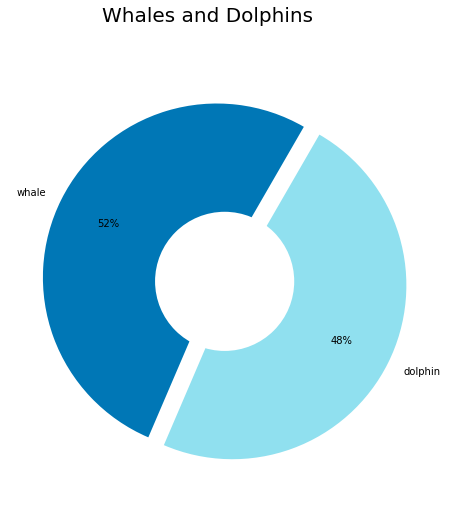

In [ ]:
fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle('Whales and Dolphins ', size = 20)
explode = (0.05, 0.05)
training_data_set['label'] = training_data_set.species.map(lambda x: 'whale' if 'whale' in x else 'dolphin')
labels = list(training_data_set.label.value_counts().index)
sizes = training_data_set.label.value_counts().values
ax.pie(sizes, explode=explode,startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.7, colors=["#0077b6","#90e0ef"])
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.show()
# https://www.kaggle.com/code/meetnagadia/happywhale-2022-using-cnn

We can also divide our picture data into two parts: whale(52%) and dolphin(48%)

1.4 original data processing
We need to process the original data so that our data matches the structure of the training data of the Tensorflow library we will be using for the purpose of entering training and testing data. Here we just use the two lines of image name and individual_id, where the individual_id numbers each specific animal, and there may be multiple different images for one animal. So the number of images is greater than the number of individual_id

In addition to this, we also perform some processing on specific images, including panning, scaling, and inversion. These can enrich the variety of training datasets（https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator）

In [ ]:
original_training_set = training_data_set[['image','individual_id']]
original_training_set.head()
# https://www.kaggle.com/code/derrickmwiti/simple-convolutional-neural-network

smaller_training_data_set = original_training_set.sample(10000)

In [ ]:
#Parameter Notes for ImageDataGenerator:
'''
rescale:      Directly inputting the pixel values of the original image may 
          fall into the "death zone" of the activation function, so set 
          the scaling factor to 1/255 to scale the pixel values between 
          0 and 1 to facilitate the convergence of the model and avoid 
          the "death" of neurons.
zoom_range:    zooming the picture
          Enhance the applicability of the training set
horizontal_filp: Randomly perform a horizontal flip operation on the image.
shear_range:   Mis-cutting transformation
width_shift_range/hight_shift_range: Horizontal position translation and up-down position translation
validation_split: A portion of the training data to be used as validation data. 
          The model will separate this part of the training data, will not train it, 
          and will evaluate the loss of this data and any model metrics at the end of each epoch.

'''
train_data_processing = ImageDataGenerator(rescale=1./255,
                        shear_range=0.2,
                        zoom_range=0.2,
                        horizontal_flip=True,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        validation_split=0.2
)

validation_data_processing = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

#get train image directory path
image_path = '/content/train_images-128-128/train_images-128-128/'

#create processed training and validation data set
individuals = list(original_training_set['individual_id'].unique())
processed_training_set = train_data_processing.flow_from_dataframe(
    original_training_set,
    image_path,
    seed=101,
    target_size=(64,64),
    labels = individuals,
    batch_size = 32,
    x_col='image',
    y_col='individual_id',
    class_mode='categorical',
    subset = "training" 
)

processed_validation_set = validation_data_processing.flow_from_dataframe(
    original_training_set,
    image_path,
    seed=101,
    target_size=(64,64),
    labels = individuals,
    batch_size = 32,
    x_col='image',
    y_col='individual_id',
    class_mode='categorical',
    subset = "validation"
)
# https://www.kaggle.com/code/derrickmwiti/simple-convolutional-neural-network

Found 40827 validated image filenames belonging to 15587 classes.
Found 10206 validated image filenames belonging to 15587 classes.


In [ ]:
individuals = list(original_training_set['individual_id'].unique())
smaller_processed_training_set = train_data_processing.flow_from_dataframe(
    smaller_training_data_set,
    image_path,
    seed=101,
    target_size=(64,64),
    labels = individuals,
    batch_size = 32,
    x_col='image',
    y_col='individual_id',
    class_mode='categorical',
    subset = "training" 
)
print(max(smaller_processed_training_set.classes))
smaller_processed_validation_set = validation_data_processing.flow_from_dataframe(
    smaller_training_data_set,
    image_path,
    seed=101,
    target_size=(64,64),
    labels = individuals,
    batch_size = 32,
    x_col='image',
    y_col='individual_id',
    class_mode='categorical',
    subset = "validation"
)

Found 8000 validated image filenames belonging to 5168 classes.
5167
Found 2000 validated image filenames belonging to 5168 classes.


2.model building

In this project, we will use the CNN framework developed by tensorflow. First we need to initialize this CNN framework according to our requirements, set some important parameters such as adding convolutional layers, pooling layers, spreading layers, and selecting activation functions.

2.1 The construction of the input layer, hidden layer and output layer

Next, we will start building the CNNmodel, where we choose the our processed data set as our input layer, for hidden layer, we will use convolutional layer with the maximum pooling layer pattern and repeat it three times, which is:
cov1->maxpooling1->cov2->maxpooling2->Dropout1->cov3->maxpooling3->Dropout2.
between second layer and thrid layer, we use a dropout layer. which andomly invalidate some nodes to allow our neural network to generalize better and avoid overfitting the test data (https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/)

after that, we use dense layer to link all nodes from the hidden layer, transform them using the activation function and pass them into the flattening layer as a new input layer.(https://analyticsindiamag.com/a-complete-understanding-of-dense-layers-in-neural-networks/)

Next, we will convert the n*n matrix into an n*1 vector in the spreading layer and then link the sense layer as the output of our entire CNN

Here, we trained marine animal with a number of 5152.


In [ ]:
model = Sequential(
    [
     Conv2D(filters=32,kernel_size=(3,3),input_shape=(64,64,3),activation='relu'),
     MaxPooling2D(pool_size=(2,2)),

     Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
     MaxPooling2D(pool_size=(2,2)),
     Dropout(0.25),

     Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
     MaxPooling2D(pool_size=(2,2)),
     Dropout(0.25),

     Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
     MaxPooling2D(pool_size=(2,2)),
     Dropout(0.25),

     Dense(128, activation='relu'),
     Flatten(),
     Dense(max(smaller_processed_training_set.classes)+1,activation='softmax')
    
    ]
)



Next, based on the CNN model we created, we use it for our training data set. In the process of training, we created 50 epoche, during each epoch we train 250 pictures. We also monitor the accuracy and loss rate of our model in real time during the training process，and collect their data after each epoch.
As plots below, our accuercy increases during training process, and loss decreases during training process.   

Epoch 1/50
250/250 [==============================] - 24s 91ms/step - loss: 8.4173 - accuracy: 0.0068 - val_loss: 8.3887 - val_accuracy: 0.0090
Epoch 2/50
250/250 [==============================] - 21s 84ms/step - loss: 8.0734 - accuracy: 0.0077 - val_loss: 8.6202 - val_accuracy: 0.0090
Epoch 3/50
250/250 [==============================] - 21s 83ms/step - loss: 7.9245 - accuracy: 0.0079 - val_loss: 8.7265 - val_accuracy: 0.0090
Epoch 4/50
250/250 [==============================] - 22s 86ms/step - loss: 7.7477 - accuracy: 0.0085 - val_loss: 8.8733 - val_accuracy: 0.0095
Epoch 5/50
250/250 [==============================] - 21s 83ms/step - loss: 7.5787 - accuracy: 0.0094 - val_loss: 9.0894 - val_accuracy: 0.0120
Epoch 6/50
250/250 [==============================] - 21s 84ms/step - loss: 7.4160 - accuracy: 0.0098 - val_loss: 9.2832 - val_accuracy: 0.0120
Epoch 7/50
250/250 [==============================] - 21s 84ms/step - loss: 7.2520 - accuracy: 0.0105 - val_loss: 9.8724 - val_accuracy:

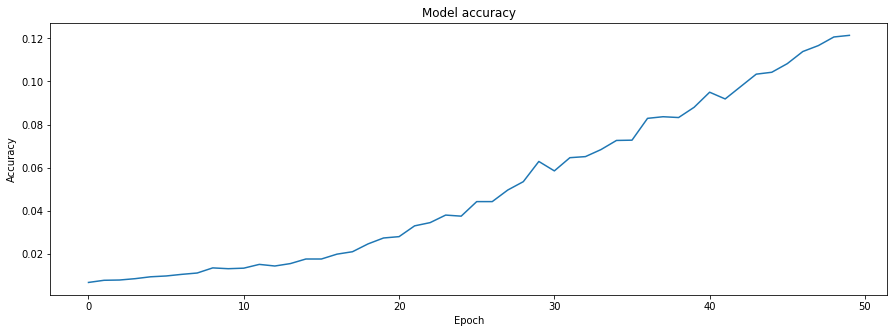

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
epochs=50 
callbacks = [EarlyStopping(patience = 3,monitor="accuracy",mode="max"),]
history = model.fit(
      smaller_processed_training_set,
      epochs=epochs, 
    validation_data=smaller_processed_validation_set,
      callbacks=callbacks)
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

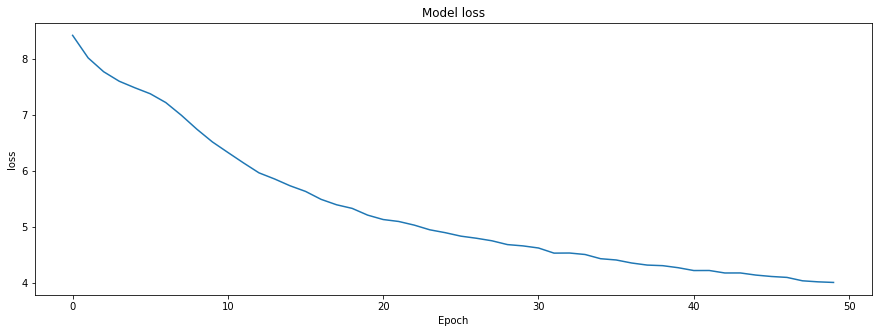

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.show()